<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

:Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df=df.drop(['fips'],axis=1)
df

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
2115626,2022-01-14,Sweetwater,Wyoming,8859,112.0
2115627,2022-01-14,Teton,Wyoming,8057,14.0
2115628,2022-01-14,Uinta,Wyoming,4522,34.0
2115629,2022-01-14,Washakie,Wyoming,1961,41.0


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)
Analyzing New York state data for COVID-19

In [3]:
NY_df=df[df['state']=='New York']
NY_df

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
519,2020-03-04,Westchester,New York,9,0.0
...,...,...,...,...,...
2114282,2022-01-14,Washington,New York,9998,97.0
2114283,2022-01-14,Wayne,New York,14359,139.0
2114284,2022-01-14,Westchester,New York,227666,2498.0
2114285,2022-01-14,Wyoming,New York,7261,75.0


In [4]:
NY_df.shape

(38790, 5)

# Task4: Understand NY covid 19 data in last 30 days

In [5]:
NY_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38790 entries, 416 to 2114286
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    38790 non-null  object 
 1   county  38790 non-null  object 
 2   state   38790 non-null  object 
 3   cases   38790 non-null  int64  
 4   deaths  38790 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:

NY_df['date']=pd.to_datetime(NY_df['date'])
NY_df['Date']=NY_df['date']
lastday=NY_df['date'].max()
NY_df = NY_df.set_index('Date')
NY_df= NY_df.sort_index()
recentNY_df=NY_df.loc[lastday-pd.Timedelta(days=30):lastday]
recentNY_df




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,county,state,cases,deaths
Date,,,,,
2021-12-15,2021-12-15,Albany,New York,36773,423.0
2021-12-15,2021-12-15,Allegany,New York,6569,128.0
2021-12-15,2021-12-15,Broome,New York,30403,450.0
2021-12-15,2021-12-15,Cattaraugus,New York,10866,173.0
2021-12-15,2021-12-15,Cayuga,New York,10511,116.0
...,...,...,...,...,...
2022-01-14,2022-01-14,Washington,New York,9998,97.0
2022-01-14,2022-01-14,Wayne,New York,14359,139.0
2022-01-14,2022-01-14,Westchester,New York,227666,2498.0


In [7]:
recentNY_df.describe()

,cases,deaths
count,1.798000e+03,1798.000000
mean,6.042732e+04,1018.449388
std,2.114677e+05,4626.173618
min,5.630000e+02,3.000000
25%,7.046500e+03,88.000000
50%,1.160650e+04,134.000000
75%,3.026325e+04,312.000000
max,2.058308e+06,36509.000000


# Comparing Covid 19 data with different states

In [8]:
fl_df=df[df['state']=='Florida']
fl_df


,date,county,state,cases,deaths
411,2020-03-01,Hillsborough,Florida,1,0.0
412,2020-03-01,Manatee,Florida,1,0.0
440,2020-03-02,Hillsborough,Florida,1,0.0
441,2020-03-02,Manatee,Florida,1,0.0
474,2020-03-03,Hillsborough,Florida,2,0.0
...,...,...,...,...,...
2112766,2022-01-14,Unknown,Florida,315,470.0
2112767,2022-01-14,Volusia,Florida,96863,1655.0
2112768,2022-01-14,Wakulla,Florida,7859,106.0
2112769,2022-01-14,Walton,Florida,13923,176.0


In [9]:

fl_df['date']=pd.to_datetime(fl_df['date'])
fl_df['Date']=fl_df['date']
fl_lastday=fl_df['date'].max()
fl_df = fl_df.set_index('Date')
fl_df= fl_df.sort_index()
recentfl_df=fl_df.loc[fl_lastday-pd.Timedelta(days=30):fl_lastday]
recentfl_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,county,state,cases,deaths
Date,,,,,
2021-12-15,2021-12-15,Alachua,Florida,40321,537.0
2021-12-15,2021-12-15,Baker,Florida,6023,122.0
2021-12-15,2021-12-15,Bay,Florida,32055,700.0
2021-12-15,2021-12-15,Bradford,Florida,5356,125.0
2021-12-15,2021-12-15,Brevard,Florida,82136,1777.0
...,...,...,...,...,...
2022-01-14,2022-01-14,Unknown,Florida,315,470.0
2022-01-14,2022-01-14,Volusia,Florida,96863,1655.0
2022-01-14,2022-01-14,Wakulla,Florida,7859,106.0


In [10]:
recentfl_df.describe()

,cases,deaths
count,2.108000e+03,2108.000000
mean,6.147844e+04,918.984820
std,1.205528e+05,1436.743156
min,2.000000e+00,24.000000
25%,6.121000e+03,104.000000
50%,1.697200e+04,475.000000
75%,6.206500e+04,1065.000000
max,1.051508e+06,9314.000000


In [11]:
print('Highest number of COVID-19 cases in NY within the last 30:',int(recentNY_df['cases'].max()),"\nHighest number of COVID-19 cases in Fl within the last 30: ",int(recentfl_df['cases'].max()),"\nNY cases are",int(recentNY_df['cases'].max()-recentfl_df['cases'].max()),"more than the cases in FL.")

Highest number of COVID-19 cases in NY within the last 30: 2058308 
Highest number of COVID-19 cases in Fl within the last 30:  1051508 
NY cases are 1006800 more than the cases in FL.


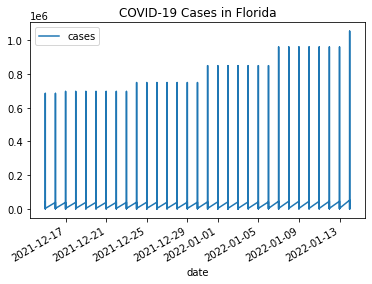

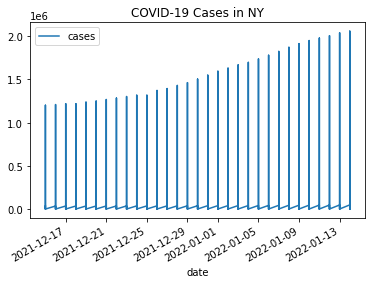

In [12]:
recentfl_df.plot(x='date',y='cases',title='COVID-19 Cases in Florida')
recentNY_df.plot(x='date',y='cases',title='COVID-19 Cases in NY')

In [13]:
print('Highest number of people who died in NY from COVID-19 within the last 30:',int(recentNY_df['deaths'].max()),"\nHighest number of people who died in Fl from COVID-19 within the last 30: ",int(recentfl_df['deaths'].max()),"\nNY deaths are",int(recentNY_df['deaths'].max()-recentfl_df['deaths'].max()),"more than the deaths in FL.")

Highest number of people who died in NY from COVID-19 within the last 30: 36509 
Highest number of people who died in Fl from COVID-19 within the last 30:  9314 
NY deaths are 27195 more than the deaths in FL.


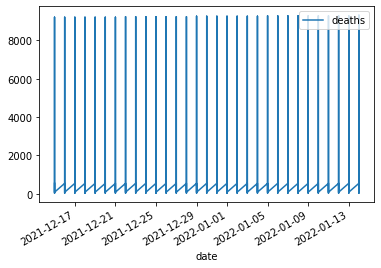

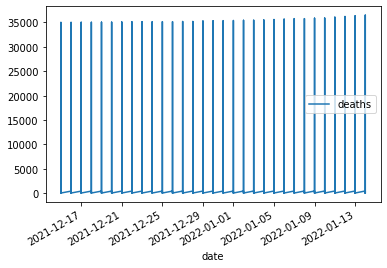

In [14]:
recentfl_df.plot(x='date',y='deaths')
recentNY_df.plot(x='date',y='deaths')

# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Within the last 30 days, NY has had more cases of COVID-19 than Florida
2.   Conclusion 2
     --Within the last 30 days, more people has died in NY from COVID-19 than in Florida 

